In [40]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
sns.set_theme(palette='colorblind',rc={'figure.figsize':(10,4)})

In [5]:
df = sm.datasets.get_rdataset('GaltonFamilies', 'HistData').data
df.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   family           934 non-null    object 
 1   father           934 non-null    float64
 2   mother           934 non-null    float64
 3   midparentHeight  934 non-null    float64
 4   children         934 non-null    int64  
 5   childNum         934 non-null    int64  
 6   gender           934 non-null    object 
 7   childHeight      934 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 58.5+ KB


- family, an object giving a identifier for each family
- father, a double giving the height of the father
- mother, a double giving the height of the mother
- midparentHeight, a double given by the average of the size of the father and the one of the mother multiplies by 1.08
- children, an integer specifying the number of children within the family
- childNum, an integer specifying the rank of the child within the family
- gender, an object giving the sex of the child
- childHeight, a double giving the heigth of the child

In [22]:
df.loc[df['gender'] == 'male', 'childHeightC'] = df[df['gender'] == 'male']['childHeight']
df.loc[df['gender'] == 'female', 'childHeightC'] = 1.08 * df[df['gender'] == 'female']['childHeight']
df['incrementHeight'] = df['childHeightC'] - df['midParentHeight']
df['twiceChildHeightC'] = 2 * df['childHeight']
df = df.rename(columns={'midparentHeight': 'midParentHeight'})
df.head()

,family,father,mother,midParentHeight,children,childNum,gender,childHeight,childHeightC,twiceChildHeightC,incrementHeight
0,001,78.5,67.0,75.43,4,1,male,73.2,73.200,146.4,-2.230
1,001,78.5,67.0,75.43,4,2,female,69.2,74.736,138.4,-0.694
2,001,78.5,67.0,75.43,4,3,female,69.0,74.520,138.0,-0.910
3,001,78.5,67.0,75.43,4,4,female,69.0,74.520,138.0,-0.910
4,002,75.5,66.5,73.66,4,1,male,73.5,73.500,147.0,-0.160


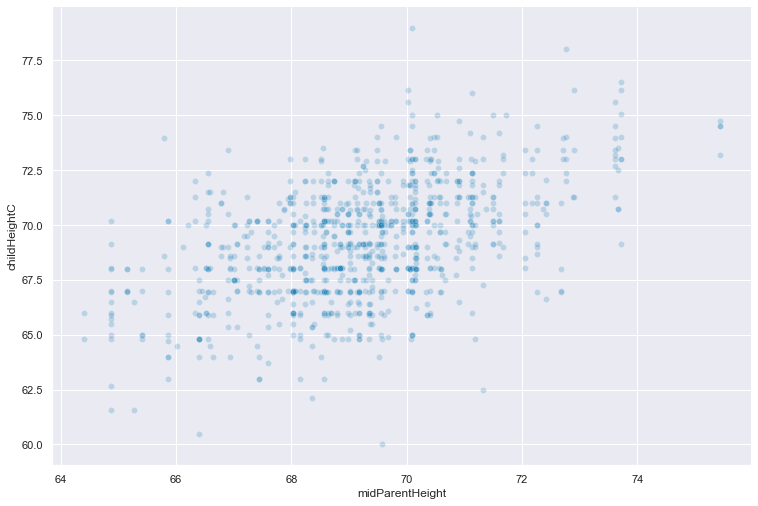

In [17]:
sns.relplot(data=df, x='midParentHeight', y='childHeightC', alpha=0.2, aspect=1.5, height=7)

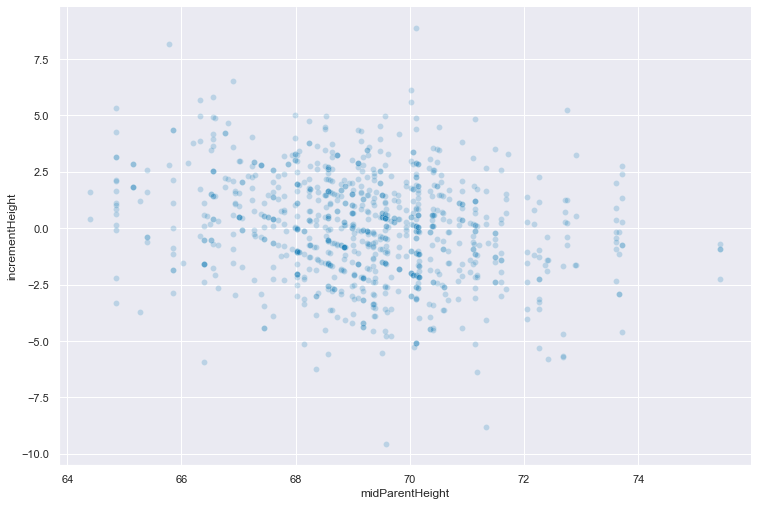

In [20]:
sns.relplot(data=df, x='midParentHeight', y='incrementHeight', alpha=0.2, aspect=1.5, height=7)

In [38]:
y, X = dmatrices('childHeightC ~ midParentHeight', data=df, return_type='dataframe')
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           childHeightC   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     305.8
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           2.00e-59
Time:                        10:36:56   Log-Likelihood:                -2079.0
No. Observations:                 934   AIC:                             4162.
Df Residuals:                     932   BIC:                             4172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.9175      2.821      7.060      0.000      14.381      25.454
midParentHeight     0.7126      0.041     17.486      0.000       0.633       0.793
==============================================================================
Omnibus:                        8.229   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.082
Skew:                          -0.116   Prob(JB):                      0.00647
Kurtosis:                       3.453   Cond. No.                     2.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

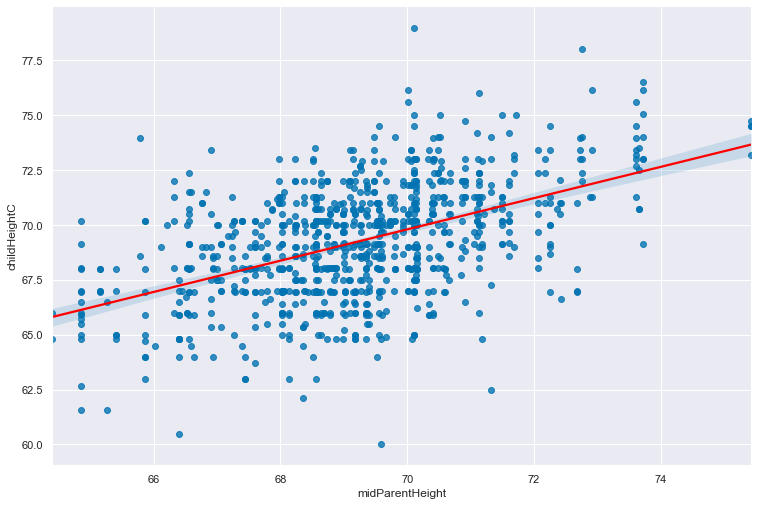

In [37]:
g = sns.lmplot(x='midParentHeight', y='childHeightC', data=df, aspect=1.5, height=7)
g.ax.get_lines()[0].set_color('red')

In [39]:
y, X = dmatrices('incrementHeight ~ midParentHeight', data=df, return_type='dataframe')
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        incrementHeight   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     49.74
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           3.42e-12
Time:                        10:37:04   Log-Likelihood:                -2079.0
No. Observations:                 934   AIC:                             4162.
Df Residuals:                     932   BIC:                             4172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.9175      2.821      7.060      0.000      14.381      25.454
midParentHeight    -0.2874      0.041     -7.053      0.000      -0.367      -0.207
==============================================================================
Omnibus:                        8.229   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.082
Skew:                          -0.116   Prob(JB):                      0.00647
Kurtosis:                       3.453   Cond. No.                     2.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
n = 100
b0 = 2
b1 = 3
X = np.random.uniform(size=n)
epsilon = np.random.randn(n)
y = b0 + b1 * X + epsilon
df = pd.DataFrame({'X': X, 'y': y})

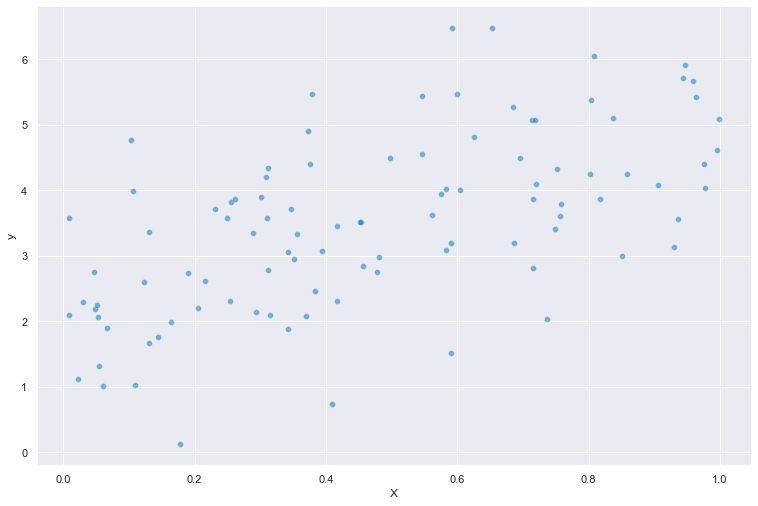

In [54]:
sns.relplot(data=df, x='X', y='y', aspect=1.5, height=7, alpha=0.5)

In [55]:
y, X = dmatrices('y ~ X', data=df, return_type='dataframe')
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     56.67
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           2.55e-11
Time:                        10:44:43   Log-Likelihood:                -147.73
No. Observations:                 100   AIC:                             299.5
Df Residuals:                      98   BIC:                             304.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1855      0.205     10.658      0.000       1.779       2.592
X              2.7785      0.369      7.528      0.000       2.046       3.511
==============================================================================
Omnibus:                        0.233   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.110
Skew:                           0.081   Prob(JB):                        0.947
Kurtosis:                       3.004   Cond. No.                         4.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

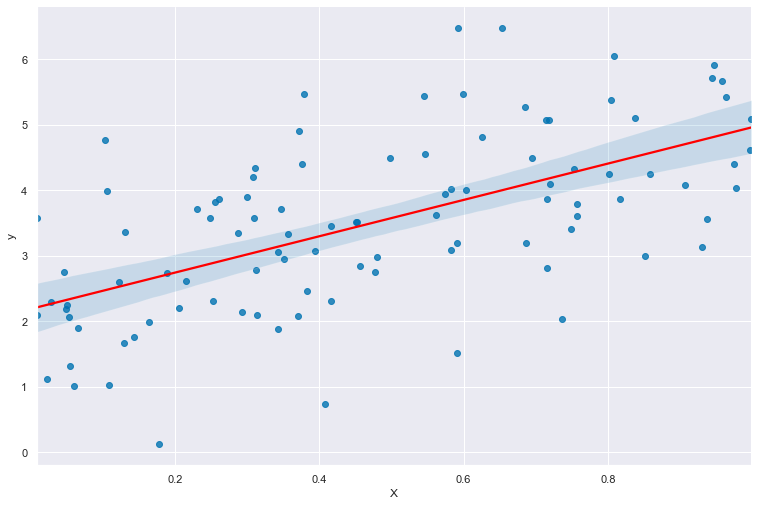

In [61]:
g = sns.lmplot(data=df, x='X', y='y', height=7, aspect=1.5)
g.ax.get_lines()[0].set_color('red')

In [76]:
n_iter = 1000
n = 100
b0 = 0.5
b1 = 2
b0_estimates = np.empty(n_iter)
b1_estimates = np.empty(n_iter)
for i in range(n_iter):
    X = np.random.uniform(size=n)
    epsilon = np.random.standard_cauchy(n)
    y = b0 + b1 * X + epsilon
    df = pd.DataFrame({'X': X, 'y': y})
    y, X = dmatrices('y ~ X', data=df, return_type='dataframe')
    res = sm.OLS(y, X).fit()
    b0_hat, b1_hat = res.params
    b0_estimates[i] = b0_hat
    b1_estimates[i] = b1_hat

Mean b0 estimates: 0.528
Median b0 estimates: 0.591


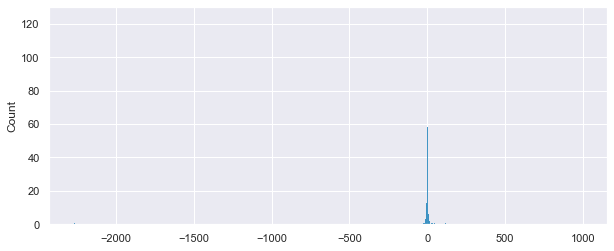

In [79]:
print('Mean b0 estimates: %.3f' % np.mean(b0_estimates))
print('Median b0 estimates: %.3f' % np.median(b0_estimates))

sns.histplot(b0_estimates)

Mean b1 estimates: 0.007
Median b1 estimates: 1.896


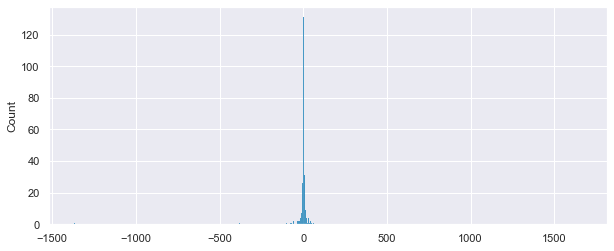

In [80]:
print('Mean b1 estimates: %.3f' % np.mean(b1_estimates))
print('Median b1 estimates: %.3f' % np.median(b1_estimates))

sns.histplot(b1_estimates)

In [86]:
df = sm.datasets.get_rdataset('airquality').data
df = df.rename(columns={'Solar.R': 'Solar'})

In [87]:
df.head()

,Ozone,Solar,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [88]:
df.describe()

,Ozone,Solar,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


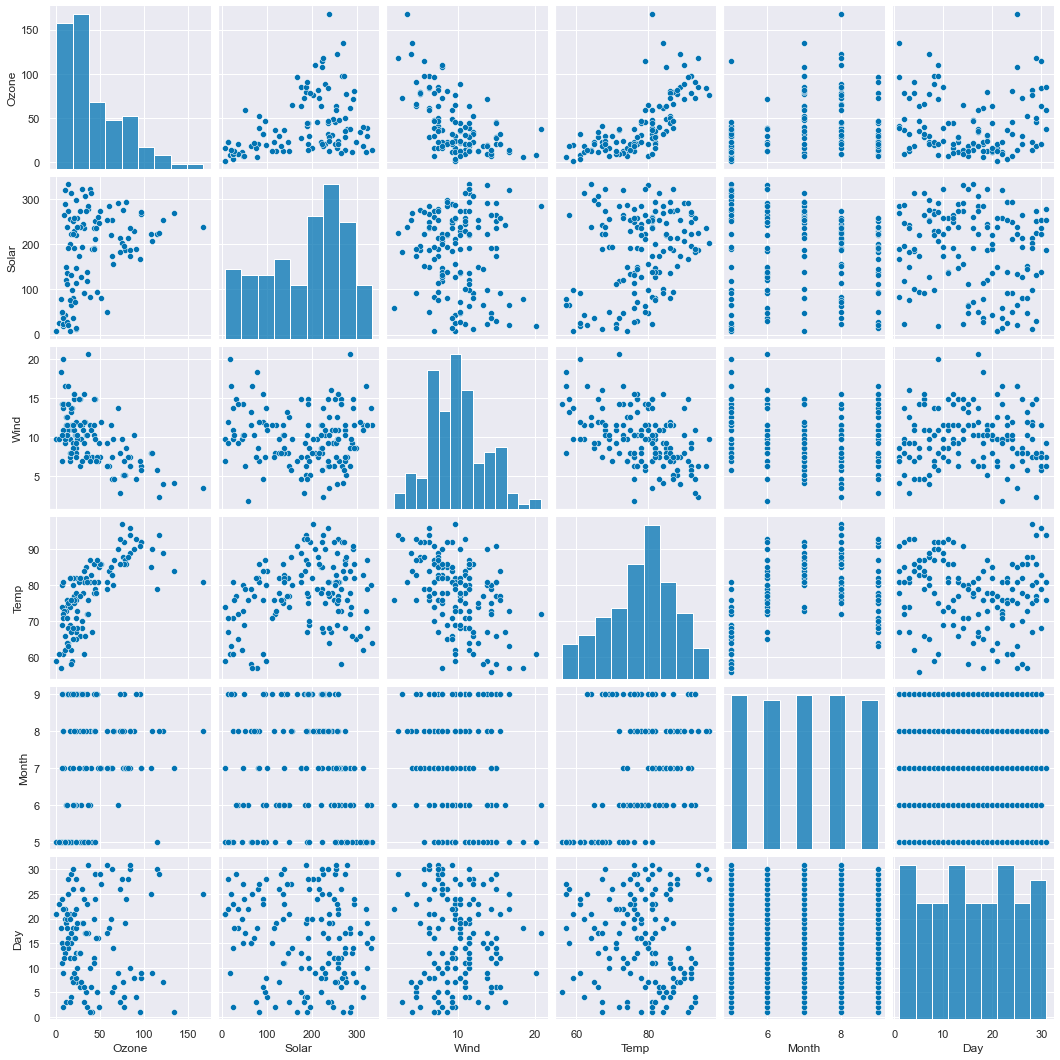

In [89]:
sns.pairplot(data=df, kind='scatter')

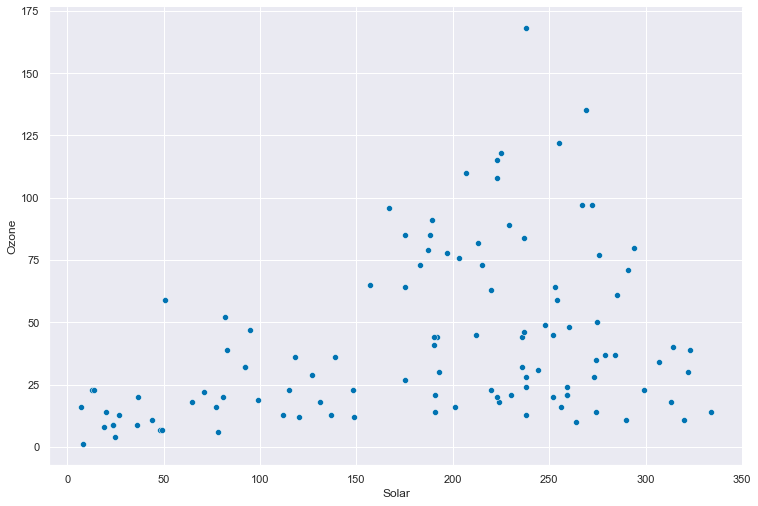

In [93]:
sns.relplot(data=df, x='Solar', y='Ozone', aspect=1.5, height=7)

In [95]:
y, X = dmatrices('Ozone ~ Solar', data=df, return_type='dataframe')
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     15.05
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           0.000179
Time:                        11:01:58   Log-Likelihood:                -538.86
No. Observations:                 111   AIC:                             1082.
Df Residuals:                     109   BIC:                             1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5987      6.748      2.756      0.007       5.225      31.973
Solar          0.1272      0.033      3.880      0.000       0.062       0.192
==============================================================================
Omnibus:                       23.356   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.348
Skew:                           1.128   Prob(JB):                     2.57e-07
Kurtosis:                       4.214   Cond. No.                         467.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

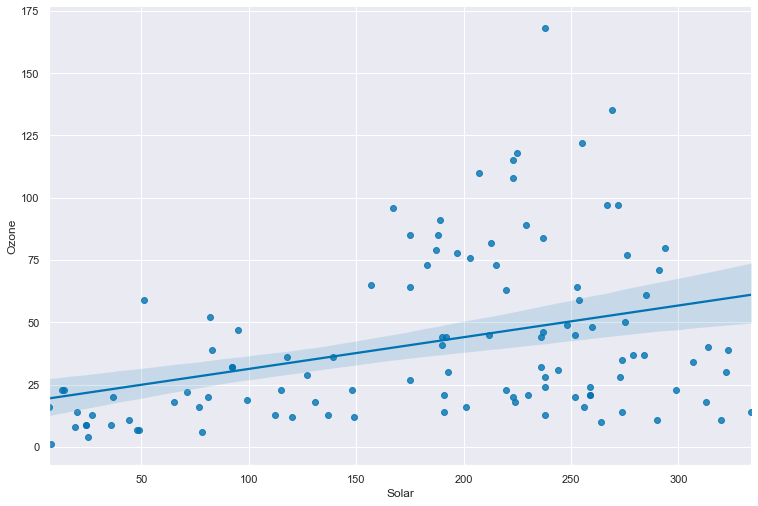

In [96]:
sns.lmplot(data=df, x='Solar', y='Ozone', height=7, aspect=1.5)

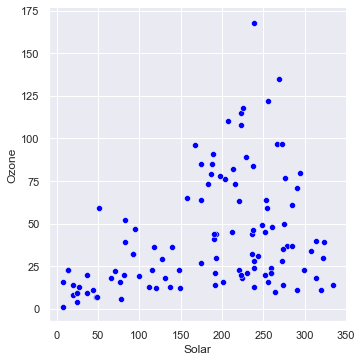

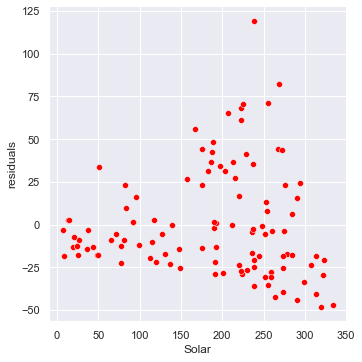

In [102]:
b0, b1 = res.params
df['residuals'] = df['Ozone'] - b0 - b1 * df['Solar']
sns.relplot(data=df, x='Solar', y='Ozone', color='blue')
sns.relplot(data=df, x='Solar', y='residuals', color='red')